<a href="https://colab.research.google.com/github/MonitSharma/Numerical-Linear-Algebra/blob/main/Norms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


# Introduction

We will however see an important concept for machine learning and deep learning. The norm is what is generally used to evaluate the error of a model. For instance it is used to calculate the error between the output of a neural network and what is expected (the actual label or value). You can think of the norm as the length of a vector. It is a function that maps a vector to a positive value. Different functions can be used and we will see few examples.

# Norms

Norms are any functions that are characterized by the following properties:

1. Norms are non-negative values. If you think of the norms as a length, you easily see why it can't be negative.

2. Norms are $0$ 
 if and only if the vector is a zero vector

3. Norms respect the triangle inequality. See bellow.

4. $||{{k}\cdot {u}}||=| {k}| \cdot |{{u}}|$ The norm of a vector multiplied by a scalar is equal to the absolute value of this scalar multiplied by the norm of the vector.

5. It is usually written with two horizontal bars: $||x||$




## The triangle inequality

The norm of the sum of some vectors is less than or equal to the sum of the norms of these vectors

$$ || u +v|| \leq ||u||+||v||$$

### Example 1
 ${u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}$ and ${v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}$

$$ ||{{u}+{v}}|| = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43$$

$$ ||u||+||v|| = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55 $$




Let's see the code results

In [3]:
u = np.array([1, 6])
u

array([1, 6])

In [4]:
v = np.array([4, 2])
v

array([4, 2])

In [5]:
u+v

array([5, 8])

In [6]:
np.linalg.norm(u+v)

9.433981132056603

In [7]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

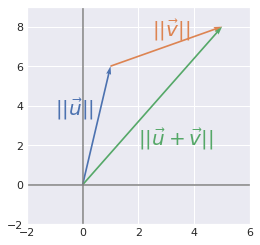

In [8]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()
plt.close()

Geometrically, this simply means that the shortest path between two points is a line

# P-norms : General Rules

Here is the recipe to get the 
$p$-norm of a vector:

1. Calculate the absolute value of each element
2. Take the power $p$ 
 of these absolute values
3. Sum all these powered absolute values
4. Take the power $\frac{1}{p}$ 
 of this result.

This is more condensly expressed with the formula:


$$ ||{{x}}_p||=(\sum_i|{x}_i|^p)^{1/p}$$

This will be clear with examples using these widely used $p$-norms.


## The $L^1$ norm

$p=1$  so this norm is simply the sum of the absolute values:

$$ ||{{x}}||_1=\sum_{i} |{x}_i|$$

## The Euclidean Norm ( L^2 norm)

The Euclidean norm is the $p$-norm with $p=2$. This may be the more used norm with the squared $L^2$ norm.


$$ ||{{x}}||_2=(\sum_i {x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i {x}_i^2}$$


Let's see an example

### Example 2

Graphically, the Euclidean norm corresponds to the length of the vector from the origin to the point obtained by linear combination (like applying Pythagorean theorem).

$$ {u}=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}$$

$$ \begin{align*}
||{{u}}||_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*} $$


So the $L^2$ norm is $5$.

-----

The $L^2$ norm can be calculates with `linalg.norm` function from `numpy`. We can check the result


In [9]:
np.linalg.norm([3, 4])

5.0

Here is the graphical representation of the vectors:

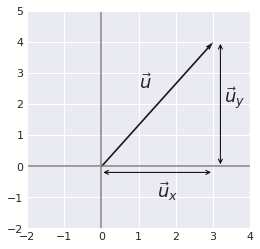

In [10]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.show()
plt.close()

In this case, the vector is in a 2-dimensional space but this stands also for more dimensions.

$$ u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}$$


$$ ||u||_2 = \sqrt{u_1^2+u_2^2+\cdots+u_n^2}$$

## The Sqaured Euclidean Norm 

$$ \sum_i|{x}_i|^2$$

The squared $L^2$ norm is convenient because it removes the square root and we end up with the simple sum of every squared values of the vector.

-----

The squared Euclidean norm is widely used in machine learning partly because it can be calculated with the vector operation ${x}^\text{T}{x}$. 




### Example 3:

$$ {x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}$$

$$ {x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}$$

$$ \begin{align*}
{x}^\text{T}{x}&=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}\\\\
&= 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
\end{align*}$$



In [11]:
x = np.array([[2], [5], [3], [3]])
x

array([[2],
       [5],
       [3],
       [3]])

In [12]:
euclideanNorm = x.T.dot(x)
euclideanNorm

array([[47]])

In [13]:
np.linalg.norm(x)**2

47.0

## Derivative of the Squared $L^2$ norm

A||nother advantage of the squared $L^2$|| is|| that its partial derivative is easily computed.

$$ u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}$$


$$ ||{u}||_2 = u_1^2+u_2^2+\cdots+u_n^2 $$

$$ \begin{cases}
\dfrac{d||{u}||_2}{du_1} = 2u_1\\\\
\dfrac{d||{u}||_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d||{u}||_2}{du_n} = 2u_n
\end{cases}$$

## Derivative of the $L^2$||

In the case of the $L^2$
norm, the derivative is more complicated and takes every elements of the vector into account:



 $$ ||{u}||_2 = \sqrt{(u_1^2+u_2^2+\cdots+u_n^2)} = (u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}$$

$$ \begin{align*}
\dfrac{d||{u}||_2}{du_1} &=
\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}-1}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{-\frac{1}{2}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
2\cdot u_1\\\\
&=\dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{align*}$$


$$ \begin{cases}
\dfrac{d||{u}||_2}{du_1} = \dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\dfrac{d||{u}||_2}{du_2} = \dfrac{u_2}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\cdots\\\\
\dfrac{d||{u}||_2}{du_n} = \dfrac{u_n}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{cases}$$

One problem of the squared $L^2$
 norm is that it hardly discriminates between 0 and small values because the increase of the function is slow.

## The Max norm
 
 It is the $L^{\infty}$
 norm and corresponds to the absolute value of the greatest element of the vector.

 $$ ||{{x}}||_\infty = \max\limits_i|x_i| $$

## Matrix Norms: The Frobenius Norm

$$ ||{{A}}||_F=\sqrt{\sum_{i,j}A^2_{i,j}}$$

This is equivalent to take the $L^2$
 norm of the matrix after flattening.


-----

The same Numpy function can be use:

In [14]:
A = np.array([[1, 2], [6, 4], [3, 2]])
A

array([[1, 2],
       [6, 4],
       [3, 2]])

In [15]:
np.linalg.norm(A)

8.366600265340756

# Expression of the dot product with norms

$${x}^\text{T}{y} = ||{{x}}||_2\cdot||{{y}}||_2\cos\theta$$


### Example 4

$$ {x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}$$ and 
$$ {y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}$$

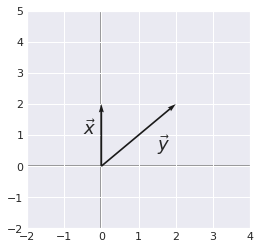

In [16]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

We took this example for its simplicity. As we can see, the angle 
$\theta$ is equal to 45°

$$ {x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4$$

and

$$ ||{{x}}||_2=\sqrt{0^2+2^2}=\sqrt{4}=2$$

$$ ||{{y}}||_2=\sqrt{2^2+2^2}=\sqrt{8}$$

$$ 2\times\sqrt{8}\times cos(45)=4$$ 

------

Here are the operations using `numpy`

In [17]:
# Note: np.cos take the angle in radian
np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.000000000000001